# Линейная регрессия

# Задание 1

Считайте файл weights_heights.csv

In [3]:
import pandas as pd

df = pd.read_csv("weights_heights.csv")

In [5]:
df.head(10)

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
5,68.69784,123.3024
6,69.80204,141.4947
7,70.01472,136.4623
8,67.90265,112.3723
9,66.78236,120.6672


In [4]:
df['Height'].values

array([65.78331, 71.51521, 69.39874, ..., 64.69855, 67.52918, 68.87761])

Разбейте данные на тренировочную и валидационную часть и обучите линейную регрессию на тренировочной части (используйте функцию linear_regression для обучения)

In [11]:
from sklearn.model_selection import train_test_split

X = df[['Height']] # матрица объект-признак

y = df['Weight'] # вектор целевой переменной

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [9]:
X.shape

(25000, 1)

# Проверим, как работает функция линейной регрессии из sklearn

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(Xtrain, ytrain) # обучение модели

print(model.coef_) # веса при признаках
print(model.intercept_) # свободный коэффициент (w0)

[3.07963723]
-82.27883357677462


$ Weight = w_0 + w_1\cdot Height$

$ Weight = -81.4 + 3\cdot Height$

In [15]:
h = 65
w = -81.4 + 3 * h

w

113.6

In [16]:
pred_test = model.predict(Xtest) # делаем предсказание

mean_squared_error(pred_test, ytest) ** 0.5 # ошибка примерно 5 кг

9.953653589562073

In [18]:
print(type(pred_test))

<class 'numpy.ndarray'>


In [19]:
pred_train = model.predict(Xtrain)

mean_squared_error(pred_train, ytrain) ** 0.5

10.110318277009135

Модель не переобучена

Посмотрим на качество линейной регрессии на кросс-валидации.

In [20]:
from sklearn.model_selection import cross_val_score

print(-cross_val_score(LinearRegression(), X, y, cv=3, 
                       scoring='neg_mean_squared_error').mean())

print(cross_val_score(LinearRegression(), X, y, cv=3, 
                       scoring='r2').mean())

101.61260513801402
0.25272630311131045


Populating the interactive namespace from numpy and matplotlib


C:\Users\kzolo\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


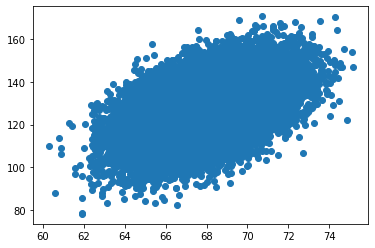

In [21]:
from matplotlib import pylab as plt
%pylab inline

scatter(df['Height'], df['Weight'])

In [ ]:
model.fit(X,y)

# Задание 2

Поработаем с датасетом Бостон.

In [22]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
X_full = data.data
y_full = data.target

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации.

In [24]:
-cross_val_score(LinearRegression(), X_full, y_full, cv=3, scoring='neg_mean_squared_error').mean()

#cross_val_score(LinearRegression(), X_full, y_full, cv=3, scoring='r2').mean()

169.00831238145477

Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [ ]:
#your code here

Нарисуем матрицу корреляций признаков.

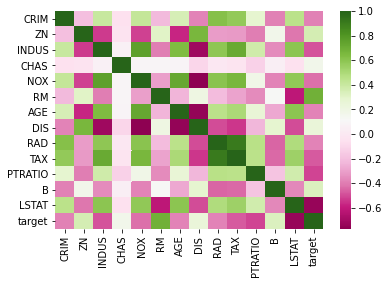

In [25]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

corr = data1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

In [26]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
del data1['RAD']

In [32]:
data1['NEW'] = data1['LSTAT'] ** 2

In [33]:
y = data1['target']

X = data1.drop('target', axis=1)

X.shape

(506, 13)

In [34]:
-cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

74.52929069251486

In [35]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean()

-0.13926862594651

In [30]:
data1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [36]:
import numpy as np

data1[data1.columns[1:]].corr()['target'][:-1]

# for c in data1.columns:
#     if c != 'target':
#         print(c)
#         print(np.corrcoef(data1[c],data1['target'])[0][1])
#         print()

ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [ ]:
#your code here

# Задание 5

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [ ]:
#your code here

# Задание 6 

Примените линейную регрессию к данным, сгенерированным ниже. Какая получилась ошибка? Как улучшить модель?

In [ ]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x*x+b-delta,m*x*x+b+delta) for x in x])

plt.scatter(x,y)

In [ ]:
#your code here

# Задание 7 (сделать дома)

Визуализируйте процесс обучения линейной регрессии, а именно:

любым способом сделайте анимацию процесса обучения, т.е. выводите регрессионную линию через 10, 20, 30 и т.д. шагов градиентного спуска. Если получится сделать анимацию - хорошо. Но можно просто вывести несколько графиков подряд.

In [ ]:
#your code here